# Capstone 3: Exploratory Data Analysis #

This stage of the project will consist of examining the dialogues and questions that were acquired through web scraping. The collections of dialogues, which have all been stored as CSV files, will be made into `pandas` DataFrames. The separate DataFrames will then be concatenated into one large DataFrame. For simplicity, the collections of dialogues have been labeled as "easy", "medium", and "hard", as this is how they were classified on the website. However, there does not seem to be much difference in difficulty from one collection to another.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create DataFrame from easy dialogues
easy = pd.read_csv('easy_dialogues.csv')
easy.shape

(3270, 3)

In [3]:
easy.head(10)

,topic,title,dialogue_line
0,dailylife0,I Live in Pasadena,Where do you live?
1,dailylife0,I Live in Pasadena,I live in Pasadena.
2,dailylife0,I Live in Pasadena,Where is Pasadena?
3,dailylife0,I Live in Pasadena,It's in California.
4,dailylife0,I Live in Pasadena,Is it in northern California?
5,dailylife0,I Live in Pasadena,No. It's in southern California.
6,dailylife0,I Live in Pasadena,Is Pasadena a big city?
7,dailylife0,I Live in Pasadena,It's pretty big.
8,dailylife0,I Live in Pasadena,"How big is ""pretty big""?"
9,dailylife0,I Live in Pasadena,"It has about 140,000 people."


In [4]:
# View unique topics
easy['topic'].unique()

array(['dailylife0', 'schoollife', 'transportation', 'entertainment',
       'dating', 'restaurant', 'sports', 'safety', 'travel', 'jobs',
       'food', 'shop', 'housing', 'election', 'health'], dtype=object)

In [5]:
# Cout number of individual dialogues
len(easy['title'].unique())

271

In [7]:
# Create DataFrame from medium/fast dialogues
medium = pd.read_csv('fast_dialogues.csv')
medium.shape

(6358, 3)

In [8]:
medium.head(10)

,topic,title,dialogue_line
0,everyday,Calling Credit Card Company,"Hi, I would like to know my credit balance."
1,everyday,Calling Credit Card Company,Of course. May I have your credit card number?
2,everyday,Calling Credit Card Company,"Yes, it's 512879346. My name is John."
3,everyday,Calling Credit Card Company,"Alright, John. You currently have no dues on y..."
4,everyday,Calling Credit Card Company,Really? I finally paid it off?
5,everyday,Calling Credit Card Company,"Yes, sir. Your balance is officially zero."
6,everyday,Calling Credit Card Company,I must admit I am proud of myself!
7,everyday,Calling Credit Card Company,"Is there anything else you'd like me to check,..."
8,everyday,Calling Credit Card Company,"Yes, can you change my card status from a coll..."
9,everyday,Calling Credit Card Company,"Of course, but you'll have to come to the bank..."


In [9]:
# View unique topics
medium['topic'].unique()

array(['everyday', 'smalltalk', 'collegelife', 'library', 'transfer',
       'food', 'shop', 'buycar', 'drive', 'apartment1', 'apartment2',
       'bus', 'employ', 'unemploy', 'crime', 'date', 'health', 'hotel',
       'social', 'travel', 'vote', 'buyhouse', 'sellhouse', 'restaurant',
       'neighborhood', 'entertain'], dtype=object)

In [10]:
# Cout number of individual dialogues
len(medium['title'].unique())

521

In [11]:
# Create DataFrame from hard dialogues
hard = pd.read_csv('int_dialogues.csv')
hard.shape

(16000, 3)

In [12]:
hard.head(10)

,topic,title,dialogue_line
0,smalltalk,Greetings,"Hi, how are you doing?"
1,smalltalk,Greetings,I'm fine. How about yourself?
2,smalltalk,Greetings,I'm pretty good. Thanks for asking.
3,smalltalk,Greetings,No problem. So how have you been?
4,smalltalk,Greetings,I've been great. What about you?
5,smalltalk,Greetings,I've been good. I'm in school right now.
6,smalltalk,Greetings,What school do you go to?
7,smalltalk,Greetings,I go to PCC.
8,smalltalk,Greetings,Do you like it there?
9,smalltalk,Greetings,It's okay. It's a really big campus.


In [139]:
# View unique topics
hard['topic'].unique()

array(['smalltalk', 'collegelife', 'library', 'transfer', 'social',
       'dating', '1apartment', '2apartment', 'bus', 'dailylife', 'bank',
       'food', 'restaurant', 'buycar', 'drive', 'health', 'employment',
       'travel', 'hotel', 'buyhouse', 'salehouse', 'community', 'crime',
       'vote'], dtype=object)

In [14]:
# Cout number of individual dialogues
len(hard['title'].unique())

450

Next we add a "level" column to each DataFrame, and then concatenate them together into one large DataFrame.

In [19]:
easy['level'] = 'easy'
easy.head()

,topic,title,dialogue_line,level
0,dailylife0,I Live in Pasadena,Where do you live?,easy
1,dailylife0,I Live in Pasadena,I live in Pasadena.,easy
2,dailylife0,I Live in Pasadena,Where is Pasadena?,easy
3,dailylife0,I Live in Pasadena,It's in California.,easy
4,dailylife0,I Live in Pasadena,Is it in northern California?,easy


In [20]:
medium['level'] = 'medium'
medium.head()

,topic,title,dialogue_line,level
0,everyday,Calling Credit Card Company,"Hi, I would like to know my credit balance.",medium
1,everyday,Calling Credit Card Company,Of course. May I have your credit card number?,medium
2,everyday,Calling Credit Card Company,"Yes, it's 512879346. My name is John.",medium
3,everyday,Calling Credit Card Company,"Alright, John. You currently have no dues on y...",medium
4,everyday,Calling Credit Card Company,Really? I finally paid it off?,medium


In [21]:
hard['level'] = 'hard'
hard.head()

,topic,title,dialogue_line,level
0,smalltalk,Greetings,"Hi, how are you doing?",hard
1,smalltalk,Greetings,I'm fine. How about yourself?,hard
2,smalltalk,Greetings,I'm pretty good. Thanks for asking.,hard
3,smalltalk,Greetings,No problem. So how have you been?,hard
4,smalltalk,Greetings,I've been great. What about you?,hard


In [78]:
# Combine DataFrames
df = pd.concat([easy, medium, hard]).reset_index()
df.shape

(25628, 5)

In [79]:
# Rearrange columns
df = df[['level', 'topic', 'title', 'dialogue_line']]
df.head()

,level,topic,title,dialogue_line
0,easy,dailylife0,I Live in Pasadena,Where do you live?
1,easy,dailylife0,I Live in Pasadena,I live in Pasadena.
2,easy,dailylife0,I Live in Pasadena,Where is Pasadena?
3,easy,dailylife0,I Live in Pasadena,It's in California.
4,easy,dailylife0,I Live in Pasadena,Is it in northern California?


Due to a flaw in the web scraping process, there are some dialogue lines that contain only numbers. Since the hard dialogue collection generally had three dialogues to a page, the web scraping code removed ones, twos, and threes from the results. However, some pages had four, five, or even six dialogues, and those numbers were unintentionally scraped. They can be easily removed now.

In [80]:
# Find rows containing only digit and period
df.loc[(df['dialogue_line'].str.len() < 3)&(df['dialogue_line'].str.contains('\d'))]

,level,topic,title,dialogue_line
12957,hard,1apartment,Scheduling an Apartment Viewing,4.
12970,hard,1apartment,Scheduling an Apartment Viewing,5.
13043,hard,1apartment,A Broken Window,4.
13064,hard,1apartment,A Broken Window,5.
13109,hard,1apartment,Asking about Public Transportation,4.
...,...,...,...,...
23091,hard,hotel,. Storing Luggage for a Few Hours,5.
23114,hard,hotel,. To Hold a Parcel for Pick-up,4.
23119,hard,hotel,. To Hold a Parcel for Pick-up,5.
23142,hard,hotel,. Calling to Cancel a Reservation,4.


In [81]:
# Drop rows containing only digit and period.
print('rows before:', len(df))
df = df[~((df['dialogue_line'].str.len() < 3)&(df['dialogue_line'].str.contains('\d')))]
df = df.reset_index(drop=True)
print('rows after:', len(df))

rows before: 25628
rows after: 25556


No it is time to begin analysis with Natural Language Processing. The first step will be to tokenize each line. After that we can count the number of tokens per line and create a histogram showing the distribution.

In [28]:
from nltk.tokenize import word_tokenize

In [82]:
word_tokenize('I live in Pasadena.')

['I', 'live', 'in', 'Pasadena', '.']

In [83]:
doc_series = df['dialogue_line'].apply(lambda text: word_tokenize(text))
doc_series

0                                [Where, do, you, live, ?]
1                               [I, live, in, Pasadena, .]
2                                 [Where, is, Pasadena, ?]
3                              [It, 's, in, California, .]
4                    [Is, it, in, northern, California, ?]
                               ...                        
25551    [Yeah, ., I, have, faith, that, he, will, help...
25552    [Our, country, really, could, use, some, work, .]
25553    [I, believe, that, change, has, already, begun...
25554                      [I, could, n't, agree, more, .]
25555    [I, no, longer, need, to, worry, about, what, ...
Name: dialogue_line, Length: 25556, dtype: object

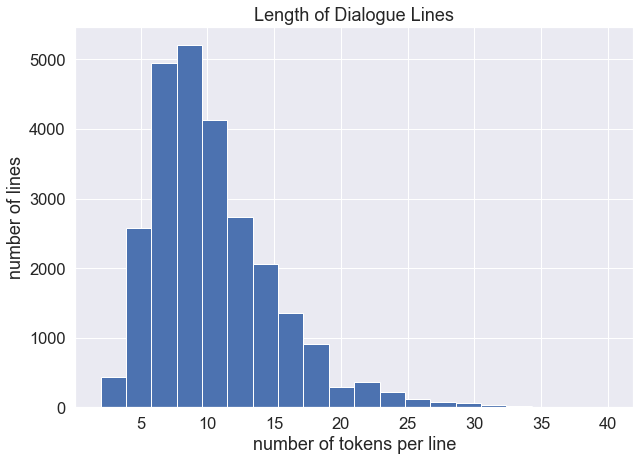

In [84]:
lengths = doc_series.apply(lambda doc: len(doc))

sns.set(font_scale=1.5)
plt.figure(figsize=(10, 7))
plt.hist(lengths, bins=20)
plt.title('Length of Dialogue Lines')
plt.xlabel('number of tokens per line')
plt.ylabel('number of lines');

Apparently the most common number of tokens per line is just under ten, while some lines have as many as forty tokens. Below, we take a look at the lines with the highest and lowest numbers of tokens. In the longest line, the speaker is asking someone out on a date. The shortest lines are all single words plus a period or question mark.

In [85]:
inds = lengths.sort_values(ascending=False)[:5].index
for i in inds:
    print(df['dialogue_line'][i])
    print('\n')

I was hoping that you and I could maybe spend a Friday evening together. I was wondering if you would like to go with me this Friday to see a movie and get a bite to eat afterwards.


I would try to avoid going in to the DMV in person. If you are a member of the Automobile Club, they oftentimes can take care of things for you or you can try the DMV website.


You need to make sure you arrive on time, smile, be pleasant and friendly, look the person in the eye and answer all questions to the best of your ability. You'll do great!


Well, my car is very old, so I didn't worry so much about what it would cost to repair it. I did buy a lot of coverage for fixing someone else's car.


As long as you are careful reading the signs, you will always know how long you can park and what days are OK to park there. Are you aware of the curb colors?




In [86]:
inds = lengths.sort_values()[:5].index
for i in inds:
    print(df['dialogue_line'][i])
    #print('\n')

Why?
Really?
Why?
Really?
Smart.


Next we get a list of all of the individual words in the dialogues, remove the stop words, and get the count of how many times each word appears.

In [34]:
from nltk.corpus import stopwords
from collections import Counter

In [87]:
token_lists = doc_series.to_list()

tokens = []
for l in token_lists:
    tokens.extend(l)


words = [w.lower() for w in tokens if w.isalpha()]
no_stops = [t for t in words if t not in stopwords.words('english')]

no_stops[:20]

['live',
 'live',
 'pasadena',
 'pasadena',
 'california',
 'northern',
 'california',
 'southern',
 'california',
 'pasadena',
 'big',
 'city',
 'pretty',
 'big',
 'big',
 'pretty',
 'big',
 'people',
 'big',
 'los']

In [88]:
# Most common words
Counter(no_stops).most_common(30)

[('would', 1395),
 ('like', 1357),
 ('need', 1241),
 ('get', 1083),
 ('know', 1011),
 ('yes', 988),
 ('go', 915),
 ('good', 886),
 ('think', 851),
 ('going', 844),
 ('want', 820),
 ('right', 685),
 ('really', 668),
 ('take', 651),
 ('help', 630),
 ('sure', 616),
 ('see', 599),
 ('one', 579),
 ('time', 574),
 ('make', 570),
 ('could', 567),
 ('well', 560),
 ('great', 495),
 ('much', 478),
 ('let', 463),
 ('thank', 426),
 ('problem', 395),
 ('okay', 372),
 ('today', 359),
 ('look', 341)]

Above, we see that even after removing all of the stop words, the most common words are still fairly ordinary words that can be used in conversations about virtually any topic. This is unsurprising, since there are over 25,000 lines of dialogue covering a huge variety of topics.

Below, we look at parts of speech, and attempt to look at the most common proper nouns. However, we will see that the NLTK library does not do a great job with this.

In [89]:
import nltk

In [90]:
# Create list of tuples, each with a token and its part of speech
tagged = nltk.pos_tag(tokens)

tagged[:20]

[('Where', 'WRB'),
 ('do', 'VB'),
 ('you', 'PRP'),
 ('live', 'VB'),
 ('?', '.'),
 ('I', 'PRP'),
 ('live', 'VBP'),
 ('in', 'IN'),
 ('Pasadena', 'NNP'),
 ('.', '.'),
 ('Where', 'NNP'),
 ('is', 'VBZ'),
 ('Pasadena', 'NNP'),
 ('?', '.'),
 ('It', 'PRP'),
 ("'s", 'VBZ'),
 ('in', 'IN'),
 ('California', 'NNP'),
 ('.', '.'),
 ('Is', 'VBZ')]

In [91]:
# Create list of tokens classified as proper nouns
proper_nouns = [x[0] for x in tagged if x[1] == 'NNP' or x[1] == 'NNPS']
proper_nouns[:20]

['Pasadena',
 'Where',
 'Pasadena',
 'California',
 'California',
 'California',
 'Pasadena',
 'Los',
 'Angeles',
 'Honda',
 'My',
 'Girls',
 'Me',
 'Poodles',
 'Are',
 'Deal',
 'Deal',
 'Tell',
 'Pasadena',
 'Rose']

Below is a count of the most common proper nouns, although we immediately see that most of the words are not proper nouns, but rather are words that were often found capitalized at the beginnings of sentences.

In [92]:
Counter(proper_nouns).most_common(20)

[('Thank', 293),
 ('Did', 274),
 ('Okay', 224),
 ('Well', 222),
 ('Are', 149),
 ('Just', 122),
 ('Hello', 108),
 ('Friday', 100),
 ('May', 92),
 ('Mr.', 88),
 ('Hi', 85),
 ('Could', 73),
 ('Saturday', 71),
 ('Fine', 58),
 ('Monday', 58),
 ('Alright', 57),
 ('Please', 56),
 ('Great', 52),
 ('Sure', 50),
 ('Me', 48)]

The next part will be fun. We are going to perform sentiment analysis on each line of dialogue. The first step will be to create a histogram showing the distribution of sentiment, and after that we can take a look at the most positive and most negative lines. NLTK's Vader Sentiment Intensity Analyzer returns a dictionary for each string analyzed, with scores for negative (neg), neutral (neu), positive (pos), and compound. The first three scores range from 0 to 1, and the compound score ranges from -1 to 1.

In [41]:
 from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [93]:
sid = SentimentIntensityAnalyzer()

In [94]:
sid.polarity_scores("I've been great. What about you?")

{'neg': 0.0, 'neu': 0.549, 'pos': 0.451, 'compound': 0.6249}

In [95]:
sentiment_series = df['dialogue_line'].apply(lambda text: sid.polarity_scores(text))
sentiment_series[:20]

0     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
5     {'neg': 0.355, 'neu': 0.645, 'pos': 0.0, 'comp...
6     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
7     {'neg': 0.0, 'neu': 0.385, 'pos': 0.615, 'comp...
8     {'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...
9     {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
10    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
11    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
12    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
13    {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...
14    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
15    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
16    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
17    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'comp

In [96]:
# Get a Series of just the compound scores
compound_list = [x['compound'] for x in sentiment_series]
compound_series = pd.Series(compound_list)
compound_series[:20]

0     0.0000
1     0.0000
2     0.0000
3     0.0000
4     0.0000
5    -0.2960
6     0.0000
7     0.4939
8     0.4939
9     0.0000
10    0.0000
11    0.0000
12    0.0000
13    0.4019
14    0.0000
15    0.0000
16    0.0000
17    0.0000
18    0.5390
19    0.6808
dtype: float64

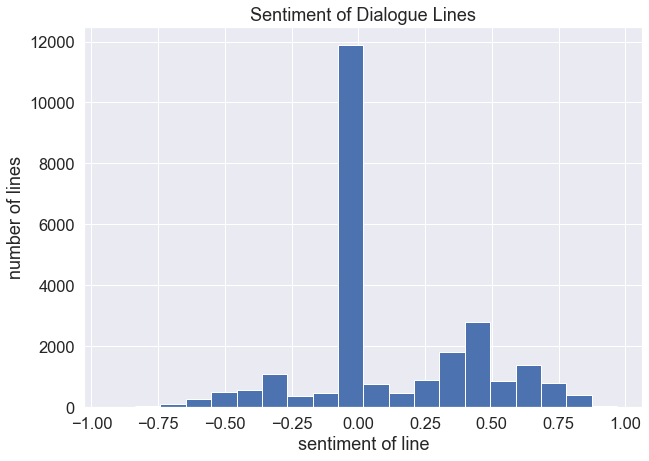

In [97]:
# Plot histogram
plt.figure(figsize=(10, 7))
plt.hist(compound_series, bins=20)
plt.title('Sentiment of Dialogue Lines')
plt.xlabel('sentiment of line')
plt.ylabel('number of lines');

Interestingly, most of the lines are exactly neutral. After that there is a fairly irregular distribution, with more lines on the positive side. Below, we will take a look at the most positive and most negative lines.

In [98]:
# Most positive lines
inds = compound_series.sort_values(ascending=False)[:10].index
for i in inds:
    print(df['dialogue_line'][i])
    print('sentiment score:', compound_series[i])
    print('\n')

You need to make sure you arrive on time, smile, be pleasant and friendly, look the person in the eye and answer all questions to the best of your ability. You'll do great!
sentiment score: 0.969


I loved the special effects and the story. I like Princess Leah. Who did you like the best?
sentiment score: 0.9413


Fine, well the job search tools are all here for you to use. Feel free to look around and use what works best for you. Have fun with it!
sentiment score: 0.9324


OK. I will mention how great you were about helping me today. I appreciate your help.
sentiment score: 0.9278


The best way is to go to a website like Travelocity or Expedia. They can help you find the best price.
sentiment score: 0.9274


I love the beautiful lawn. What a great front entryway!
sentiment score: 0.9259


I would be happy to help. What would you like me to help with, food or entertainment?
sentiment score: 0.9246


Oh, wow! Well, here is my last $10. Please send my best to Chris.
sentiment score: 0.9

In [99]:
# Most negative lines
inds = compound_series.sort_values()[:10].index
for i in inds:
    print(df['dialogue_line'][i])
    print('sentiment score:', compound_series[i])
    print('\n')

There is a new horror flick about a rapist serial killer.
sentiment score: -0.9313


I started feeling kind of sick last night after dinner, but this morning the pain got really bad!
sentiment score: -0.9158


I'm sorry, but no. We used to have a trainer, but then he had an unfortunate accident.
sentiment score: -0.9022


If we are bad, we will be unhappy forever in hell.
sentiment score: -0.8979


Crime can happen anywhere, but it is a little worse here because of the poverty.
sentiment score: -0.8863


I am scared of flying to begin with, but bad weather makes it a little worse.
sentiment score: -0.8863


I was thinking about seeing that one about the rapist serial killer.
sentiment score: -0.8807


There were several rooms, but the worst leak was in the bathroom.
sentiment score: -0.8674


I've had it a few days, but the rash really got bad last night.
sentiment score: -0.8663


It is unsafe because a rapist could hide in there and attack women.
sentiment score: -0.8658




Above, we see that the sentiment analysis seems to work pretty well. The positive statements are really positive, and the negative statements are really negative. Below, we are going to quickly change one of the lines in the dialogue. The dialogue is about getting a new kitten, and the speaker says "I'll call him Blacky". Since this line could easily be considered offensive if taken out of context, we will change the name to something different.

In [114]:
df.loc[df.dialogue_line.str.contains('Blacky')]

,level,topic,title,dialogue_line
309,easy,dailylife0,Kittens to Give Away,I'll call him Blacky.


In [118]:
df.dialogue_line[309] = "I'll call him Strider"

In [121]:
df.iloc[309]

level                             easy
topic                       dailylife0
title             Kittens to Give Away
dialogue_line    I'll call him Strider
Name: 309, dtype: object

This next part will be even more fun. We are going to use a Decision Tree Classifier from SciKit Learn to build a simple chatbot from scratch. Ultimately, the final chatbot will be made using a different framework, but this is an interesting exercise to show how a converational chatbot can work.

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline
import string

We start by duplicating the column containing the dialogue lines. We remove the last line from the first column, and the first line from the second column, and then combine them together to create a DataFrame of statement/response pairs.

In [100]:
text_pairs = pd.DataFrame({'text1': df.dialogue_line[:-1], 'text2': df.dialogue_line[1:].reset_index(drop=True)})
text_pairs.head()

,text1,text2
0,Where do you live?,I live in Pasadena.
1,I live in Pasadena.,Where is Pasadena?
2,Where is Pasadena?,It's in California.
3,It's in California.,Is it in northern California?
4,Is it in northern California?,No. It's in southern California.


In [101]:
text_pairs.shape

(25555, 2)

The next step is to create a pipeline that converts each line into a bag of words, preforms a TF-IDF transformation (placing greater significance on words less common to the dataset), and finally applies the Decision Tree Classifier. The classifier treats each response in the `text2` column as a class, and evaluates inputs based on their similarity to statements in the `tex1` column.

In [102]:
# Function to create "bag of words"
def cleaner(x):
    return [a for a in (''.join([a for a in x if a not in string.punctuation])).lower().split()]

In [103]:
# Create pipeline
pipe = Pipeline([
    ('bow', CountVectorizer(analyzer=cleaner)),
    ('tfidf', TfidfTransformer()),
    ('classifier', DecisionTreeClassifier())
])

In [104]:
# Fit pipeline
pipe.fit(text_pairs['text1'], text_pairs['text2'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x7fe12c0ef378>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

Let's try it out!

In [112]:
pipe.predict(['Hi, how are you doing?'])[0]

"I'm fine. How about yourself?"

In [106]:
pipe.predict(['What is there to eat?'])[0]

"I don't know. Look in the fridge."

In [113]:
pipe.predict(["I'm bored."])[0]

"What's on TV?"

In [108]:
pipe.predict(['Do animals talk to each other?'])[0]

'Of course they talk to each other.'

In [105]:
pipe.predict(['We need to talk.'])[0]

'Uh oh! It sounds like you are going to break up with me or are pregnant.'

In [110]:
pipe.predict(["I really don't like olives."])[0]

"What's your problem with him?"

In [111]:
pipe.predict(['I used to go fishing all the time.'])[0]

'The swim stations are open daily from 7 a.m. to 10 p.m.'

In [140]:
pipe.predict(['What games do you like to play?'])[0]

'I want to go on the slide.'

In [141]:
pipe.predict(['I have lived in five different cities.'])[0]

"I'm visiting friends. If you don't mind me asking, what are you going to do?"

In [143]:
pipe.predict(['Trump says he won the election.'])[0]

"That can't be true!"

This simple chatbot works remarkably well, especially considering it was created with a Decision Tree Classifier, which is not specifically designed for this type of task. The final verion will have additional features, such as grammar correction, and the ability to look up words, but we already have a model that works pretty well. Another feature of the final chatbot will be that whenever it is unsure how to respond, it will simply ask a random question in order to continue the conversation. Below is a `pandas` Series of questions that were scraped for this purpose. We'll take a quick look, and make a few adjustments to the Series.

In [124]:
questions_df = pd.read_csv('esl_questions.csv')
questions_series = questions_df['0']
questions_series

0                                 Do you have any pets?
1                      What was the last book you read?
2                                  Do you like to cook?
3                            What's your favorite food?
4                 Are you good at cooking/swimming/etc?
5                            Are you married or single?
6                                 Do you like baseball?
7                                    Do you live alone?
8               Do you live in a house or an apartment?
9               Have you ever lived in another country?
10                   Have you ever met a famous person?
11                     How do you spend your free time?
12             How long have you been studying English?
13                                     How old are you?
14                                    How tall are you?
15    Tell me about a favorite event of your adulthood.
16    Tell me about a favorite event of your childhood.
17                               What are your h

In [129]:
# Edit incomplete question
print('original:', questions_series[18])
questions_series[18] = 'What two things could you not do when you were five years old?'
print('new:', questions_series[18])

original: What two things could you not do when you were...?
new: What two things could you not do when you were five years old?


In [137]:
# Change bizarre, negative sounding question to a more normal one
print('original:', questions_series[55])
questions_series[55] = 'So how have you been lately?'
print('new:', questions_series[55])

original: What is the worst memory of our country?
new: So how have you been lately?


Finally, it's time to save DataFrame containing the dialogues and the Series containing the questions to new CSV files.

In [146]:
df.to_csv('all_dialogues.csv', index=False)
questions_series.to_csv('starter_questions.csv', index=False)